<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week12/w12_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **07 군집화**

## **01 K-평균 알고리즘 이해**

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
- 특정한 임의의 지점인 군집 중심점(centroid)을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

**K-평균 동작 과정**

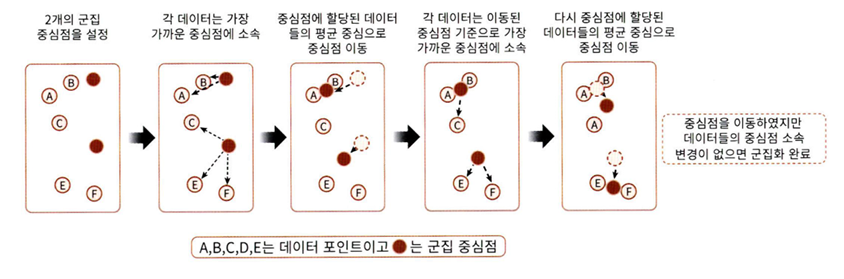
1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다.

  (초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓지만, 설명을 위해 임의의 위치로 가정)
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다.
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다.
4. 중심점이 이동했으므로, 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 소속을 변경한다.
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다.
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료한다.

  그렇지 않으면 다시 4번 과정을 거쳐 소속을 변경하고 이 과정을 반복한다.

**K-평균 장점**
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

**K-평균 단점**
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이를 위해 PCA로 차원 감소 적용해야 할 수도)
- 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

**사이킷런 KMeans 클래스 소개**

K-평균 구현을 위한 사이킷런 KMeans 클래스
- 초기화 파라미터

  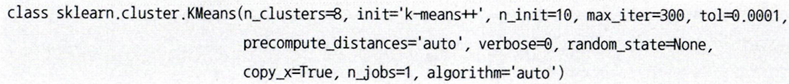

**주요 파라미터**
- `n_clusters`: 군집화할 개수 = 군집 중심점 개수
- `init`: 초기 군집 중심점의 좌표 설정 방식. 일반적으로 k-means++ 방식 사용
- `max_iter`: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

**군집화 수행**
- 사이킷런의 비지도학습 클래스와 마찬가지로 `fit()`, `fit_transform()` 메서드 이용
- 군집화 수행 완료된 KMeans 객체는 주요 속성 정보를 가짐
  - `labels_`: 각 데이터 포인트가 속한 군집 중심점 레이블
  - `cluster_centers_`: 각 군집 중심점 좌표(Shape: [군집 개수, 피처 개수]). 이를 이용해 군집 중심점 좌표 시각화 가능

### **K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**붓꽃 데이터 세트를 3개 그룹으로 군집화하기**
- 군집 개수: 3
- 초기 중심 설정 방식: k-means++ (default)
- 최대 반복 횟수: 300 (default)

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

**각 데이터가 어떤 중심에 속하는지 속성값 확인**

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- labels_의 값: 0,1,2

**실제 붓꽃 품종 분류 값과 얼마나 차이 나는지로 군집화 효과적인지 확인**

In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- Target 0 데이터: 1번 군집으로 모두 잘 그루핑
- Target 1 데이터: 2개만 2번 군집, 나머지는 모두 0번 군집으로 그루핑
- Target 2 데이터: 0번 군집과 2번 군집에 분산돼 그루핑

**군집화 시각화하기**
- 붓꽃 데이터 세트의 속성이 4개이므로, PCA를 이용해 2개로 차원 축소

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

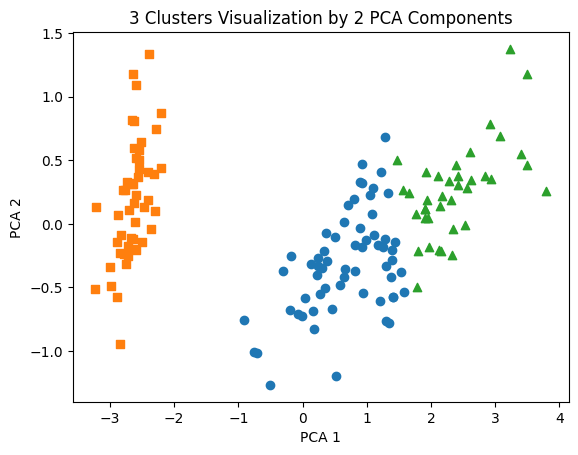

In [7]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')

### **군집화 알고리즘 테스트를 위한 데이터 생성**

군집화 알고리즘 테스트를 위한 사이킷런의 데이터 생성기
- `make_blobs()`, `make_classification()`
  - make_blobs(): 개별 군집의 중심점과 표준 편차 제어 기능 추가
  - make_classification(): 노이즈를 포함한 데이터 생성에 유용
- 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음

**make_blobs() 사용법**
- n_samples: 생성할 총 데이터 개수 (default: 100)
- n_features: 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정
- centers: (int) 군집의 개수  (ndarray) 개별 군집 중심점의 좌표
- cluster_std: 생성될 군집 데이터의 표준 편차
  - e.g.[0.8, 1.2, 0.6] -> 군집 1 데이터: 표준편차=0.8, 군집 2 데이터: 표준편차=1.2, 군집 3 데이터: 표준편차=0.6

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [7]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


**군집화 분포 확인**

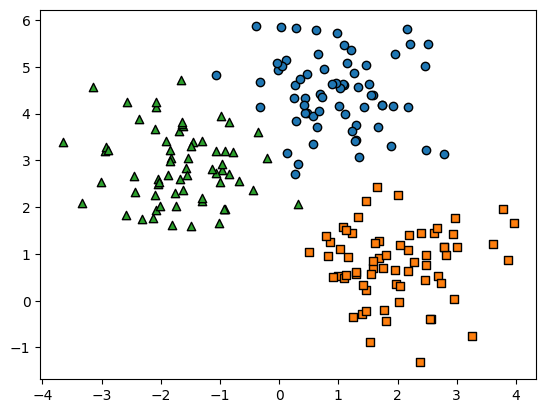

In [8]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

**KMeans 군집화를 수행한 뒤 군집별로 시각화하기**
- KMeans 객체에 fit_predict(X) 수행해 make_blobs()의 X 군집화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


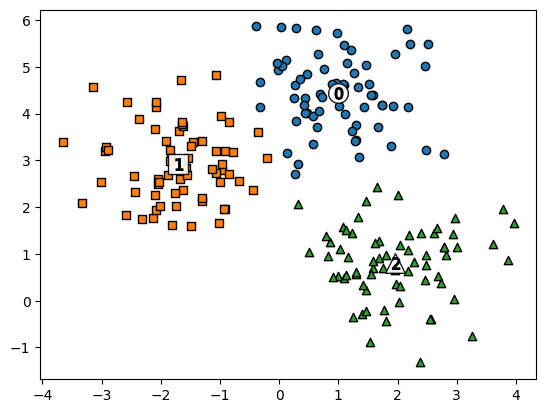

In [9]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음

In [10]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


거의 대부분 잘 매핑됨

make_blobs()의 cluster_std 파라미터는 데이터의 분포도 조절
- cluster_std에 따른 데이터 분포 시각화

  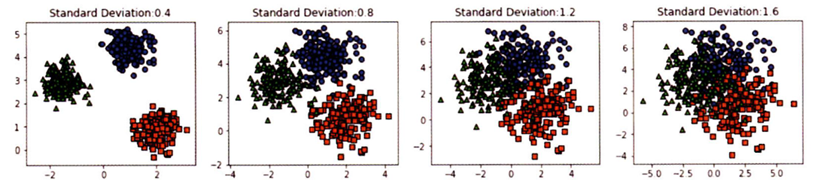

## **02 군집 평가(Cluster Evaluation)**

- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않음
- 군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다름
  - 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미 부여
  - 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화 추구
  - 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등


### **실루엣 분석의 개요**

비지도학습 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵지만, 군집화 성능 평가의 대표적인 방법으로 실루엣 분석을 이용

**실루엣 분석(silhouette analysis)**
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지
  - 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 뭉쳐 있음
  - 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것
- **실루엣 계수(silhouette coefficient)**: 개별 데이터가 가지는 군집화 지표
  - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집 데이터와는 얼마나 멀리 분리돼 있는지

  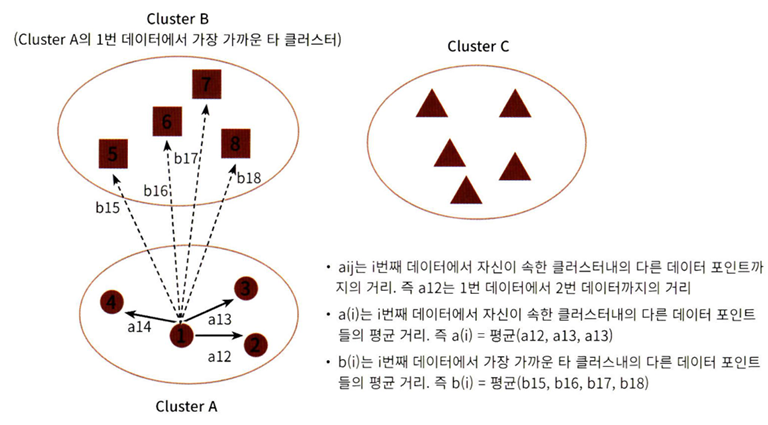
  - a(i): 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 평균 거리
  - b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
  - b(i)-a(i): 두 군집 간의 거리가 얼마나 떨어져 있는지 나타낸 값
    - 정규화하기 위해 MAX(a(i), b(i))로 나눔

i번째 데이터 포인트의 실루엣 계수 값 s(i)
$$s(i)=\frac{b(i)-a(i)}{max(a(i), b(i))}$$
- 범위: -1~1
  - 1에 가까워질수록 근처 군집과 멀리 떨어져 있음
  - 0에 가까울수록 근처 군집과 가까워짐
  - 음수: 아예 다른 군집에 데이터 포인트가 할당됨
  
**메서드**
- `sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)`: 인자로 X feqture 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환
- `sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)`: 인자로 X feature와 labels를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환 = `np.mean(silhouette_samples())`

  일반적으로 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 그런 것은 아님

**좋은 군집화의 기준**
1. 전체 실루엣 계수의 평균값=`silhouette_score()` 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요
  - 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 구닙들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님

### **붓꽃 데이터 세트를 이용한 군집 평가**

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoueete_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Ananlysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhoueete_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Ananlysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 값은 약 0.553

**군집별 평균 실루엣 계수 값 알아보기**

In [5]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 0번은 약 0.41, 2번은 약 0.45로 상대적으로 평균값이 낮음

### **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없음

특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음

개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음

**군집 개수 2개로 설정**

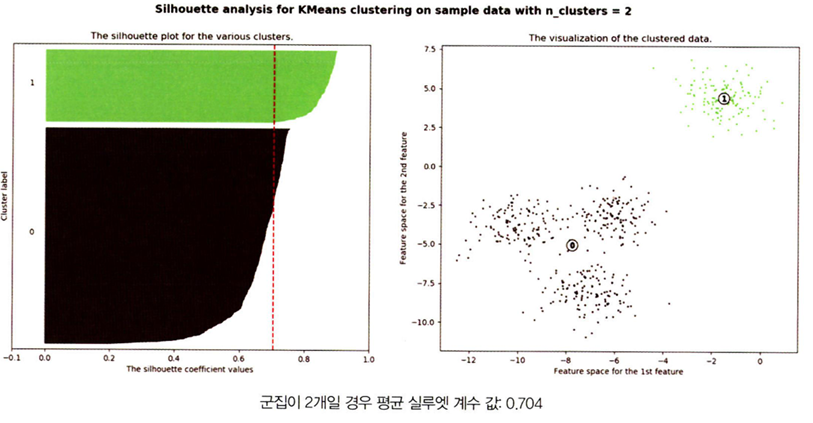
- 평균 실루엣 계수는 0.704로 매우 높음
- 왼쪽 그림: 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 결과
  - 1번 군집; 모든 데이터가 평균 실루엣 계수 값 이상
  - 2번 군집: 평균보다 적은 데이터 값이 매우 많음
- 오른쪽 그림
  - 1번 군집: 0번 군집과 멀리 떨어져 있고, 내부 데이터끼리도 잘 뭉쳐있음
  - 0번 군집: 내부 데이터끼리 많이 떨어져 있음

**군집 개수 3개로 설정**

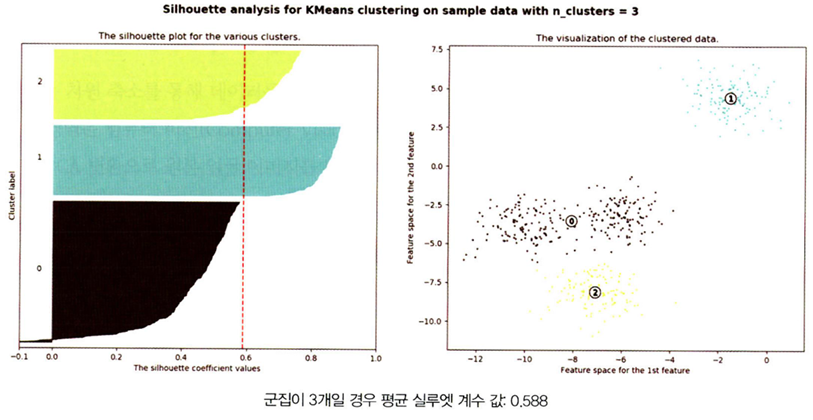
- 평균 실루엣 계수는 약 0.588
- 왼쪽 그림
  - 1,2번 군집: 평균보다 높은 실루엣 계수 값을 가짐
  - 0번 군집: 모두 평균보다 낮음
- 오른쪽 그림
  - 0번 군집: 내부 데이터 간의 거리도 멀지만, 2번 군집과도 가깝게 위치

**군집 개수 4개로 설정**

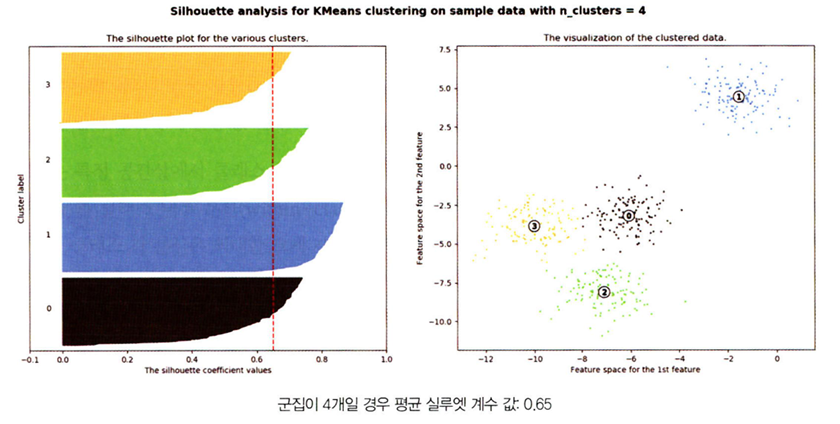
- 평균 실루엣 계수는 약 0.65
- 왼쪽 그림
  - 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치
  - 1번 군집: 모두 평균보다 높은 계수 값
  - 0, 2번 군집: 절반 이상이 평균보다 높은 계수 값
  - 3번 군집: 이 군집만 약 1/3 정도가 평균보다 높은 계수 값 가짐

=> 군집 2개보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 수 있다.

In [6]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

X_features에 대해 군집이 2,3,4,5개일 때 군집별 평균 실루엣 계수 값을 알고 싶을 때

  ```
  visualize_silhouette([2,3,4,5], X_features)
  ```



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


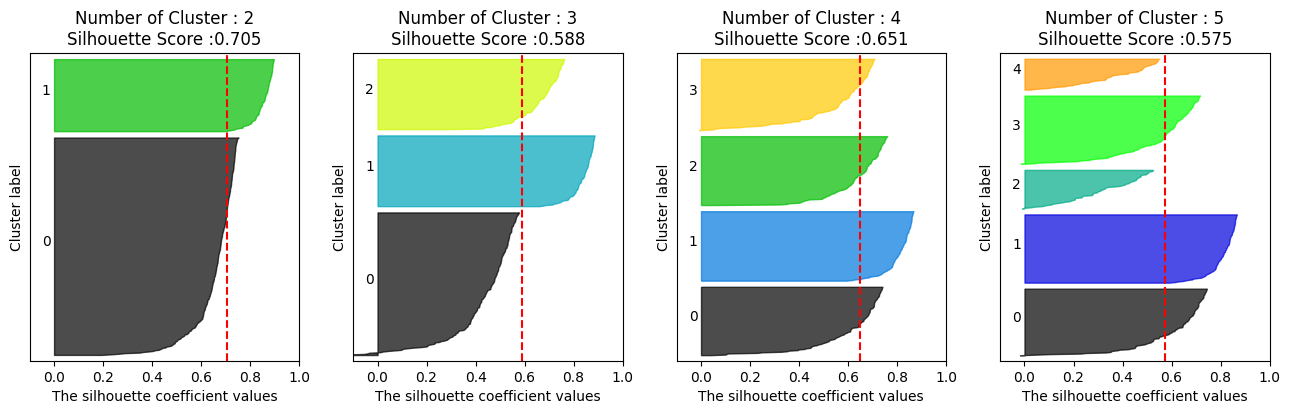

In [7]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 데이터 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0,10.0), shuffle=True, random_state=1)

# 군집 개수가 2,3,4,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

- 위에서 확인했듯이 4개일 때 가장 최적

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


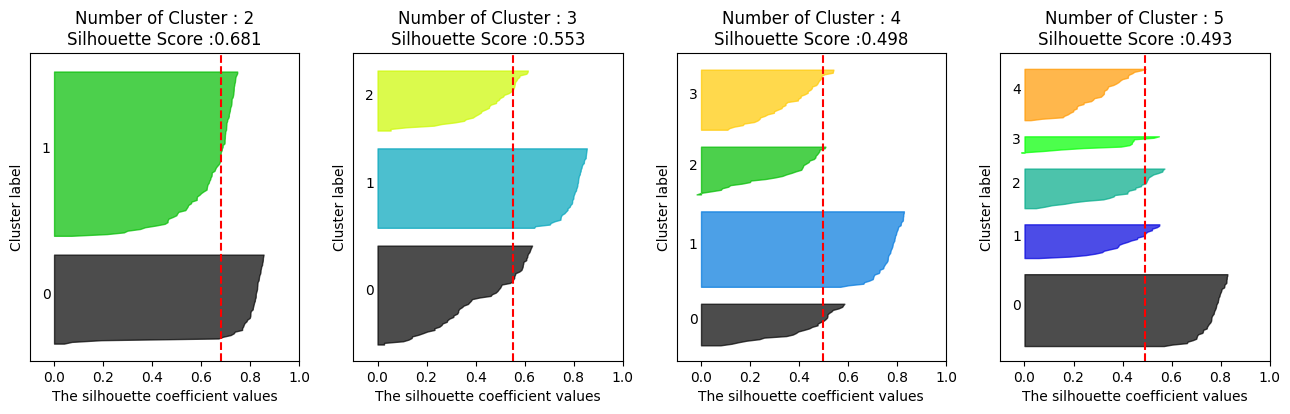

In [8]:
# K-평균 수행 시 최적의 군집 개수
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

- 붓꽃 데이터를 K-평균으로 군집화하는 경우에는 2개로 하는 것이 가장 좋아보임

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만,

각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 증가하는 단점